In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt



#makes viewing pandas tables better
pd.set_option('display.max_colwidth', 0)

## Download TNseq data

In [3]:
#change this to where your FASTQs are

FASTQ_directory = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase'

In [4]:
fastq_files = !ls {FASTQ_directory}/*.fastq.gz

for f in fastq_files:

    size = !du -sh {f}
    size = size[0].split('\t')[0]
    
    print('{}: {}'.format(f, size))

/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/OORB026_S1_L001_R1_001.fastq.gz: 81M
/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/OORB026_S1_L001_R2_001.fastq.gz: 91M


## Merge paired end reads

This step combines the forward and reverse mate pairs from two fastq files.

In [5]:
#check that these are the files you want - if not, set the fastq list to the correct list of paths by hand
#eg: fastqs = ['correctfile1_R1_001.fastq.gz', correctfile2_R1_001.fastq.gz]

fastqs = !ls {FASTQ_directory}/*R1_001.fastq.gz
fastqs

['/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/OORB026_S1_L001_R1_001.fastq.gz']

In [7]:
!mkdir /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/TNSeq_merge_FASTQ

In [8]:
for fastq in fastqs:
    
    fastq_prefix = fastq.replace('_R1_001.fastq.gz', '')
    output_prefix = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/TNSeq_merge_FASTQ/{}'.format(fastq_prefix.split('/')[-1])
    
    cmd = "nice -n 17 /usr2/people/mabrams/bin/bbmap/bbmerge.sh in1={}_R1_001.fastq.gz in2={}_R2_001.fastq.gz out={}_merged.fastq ihist={}_hist.txt".format(fastq_prefix,
                                                                                                          fastq_prefix,
                                                                                                          output_prefix,
                                                                                                          output_prefix)
    !{cmd}

java -ea -Xmx1000m -Xms1000m -Djava.library.path=/usr2/people/mabrams/bin/bbmap/jni/ -cp /usr2/people/mabrams/bin/bbmap/current/ jgi.BBMerge in1=/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/OORB026_S1_L001_R1_001.fastq.gz in2=/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/OORB026_S1_L001_R2_001.fastq.gz out=/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/TNSeq_merge_FASTQ/OORB026_S1_L001_merged.fastq ihist=/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/Tnseq_fastq_files/Tnseq_fastq_files_jumpstart_polymerase/TNSeq_merge_FASTQ/OORB026_S1_L001_hist.txt
Executing jgi.BBMerge [in1=/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_wit

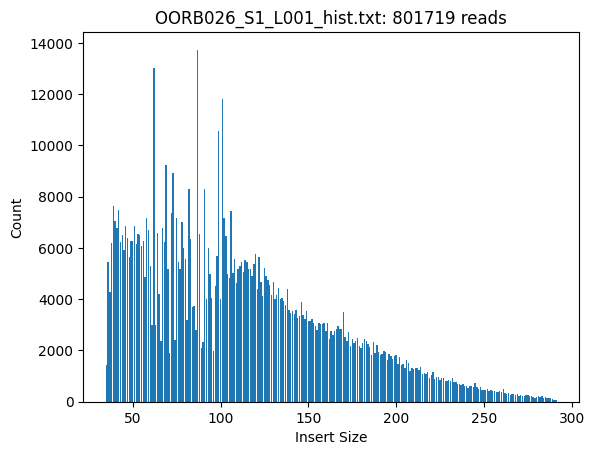

In [12]:
#plot output histograms of insert size vs. count

histogram_files = !ls {FASTQ_directory}/*_hist.txt

for f in histogram_files:
    
    df = pd.read_csv(f, sep='\t', comment='#', header=None)
    df.columns = ['Insert Size', 'Count']
    
    reads = sum(df['Count'])
    
    plt.bar(df['Insert Size'], df['Count'])
    plt.ylabel('Count')
    plt.xlabel('Insert Size')
    plt.title('{}: {} reads'.format(f.split('/')[-1], reads))
    plt.show()

In [ ]:
FASTQ_directory = 'TNSeq_merge_FASTQ'
num_seqs_to_sample = 10000
merged_FASTQs = !ls {FASTQ_directory}/*_merged.fastq

for f in merged_FASTQs:
    
    print(f)
    outfile = f.replace('.fastq', '_subsample.fastq')
    cmd = '/usr2/people/gtl/bin/seqtk/seqtk sample {} {}'.format(f, num_seqs_to_sample)
    
    !{cmd} > {outfile}